<a href="https://colab.research.google.com/github/ArifAygun/Magnimind-ML/blob/main/AA_3_04_RidgeRegressionSt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ridge

- Transform the Boston House dataset using polynomial transformation and split the dataset into test and train datasets
- Run cross validation with Ridge Regression
- Plot the coefficients of the model

In [23]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.impute import SimpleImputer
#from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, LinearRegression, Lasso, RidgeCV, LassoCV
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import os

def file_locator(file_name):
  main_dir = os.getcwd()

  for dir, folder, files in os.walk(main_dir):
    for file in files:
      if file == file_name:
        file_path = os.path.join(dir,file)
  return file_path

file_path = file_locator('boston_house_prices.csv')
data = pd.read_csv(file_path)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
data.shape

(506, 14)

In [6]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [7]:
X = data.drop(['MEDV'], axis=1)

In [8]:
y = data.MEDV

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [25]:
myT = Pipeline([('scaler', StandardScaler()),
                ('imputer', SimpleImputer()),
                ('poly', PolynomialFeatures(degree=2, include_bias=False)),
                ('ridge', Ridge(alpha=10))])

In [11]:
ridge_model = myT.fit(X_train, y_train)

In [20]:
coefficients = ridge_model.named_steps['ridge'].coef_

In [17]:
zz = ridge_model.named_steps['poly'].fit_transform(X_train)

In [18]:
zz.shape

(379, 104)

In [16]:
X_train.shape

(379, 13)

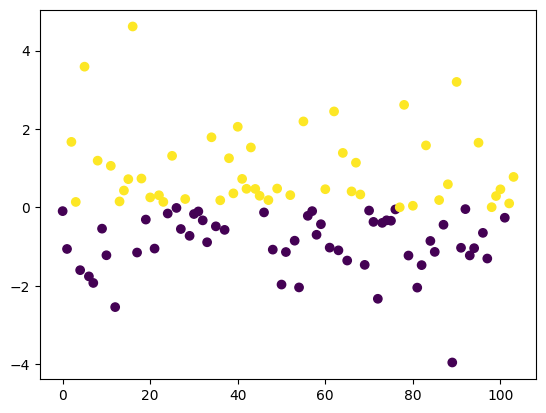

In [26]:
plt.scatter(range(zz.shape[1]), coefficients, c = np.sign(coefficients))

- Start a grid search for `alpha` value
- Plot the model performance versus the different `alpha` values 

In [27]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [29]:
np.linspace(-3,3,13)

array([-3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,
        2.5,  3. ])

In [28]:
np.logspace(-3,3,13)

array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03])

In [ ]:
param_grid = {'alpha':}

- Print the best parameter score
- Print the best model score

- Plot the model coefficients

- Plot the model coefficients for alpha=1, 14, and 100

- Create a learning curve for different data train sizes

- Create the learning curve plot for different train size and alpha= 1, 14, and 100

In [ ]:
ML Pipeline (Applied ML)-->algorithms (Math, especially Linear Algebra)
1. Decide classification or regression ---> (Linear Regression, Ridge), Logistic Regression (C)
2. Preprocessing (python mostly, but SQL will be helpful)--> imputation, onehotencoding, scaling, PCA, ..
3. hyperparameter tuning --> Crossvalidation, gridsearch, ...
4. testing--> evaluation (precision, recall, f1, confusion matrix, ROc, AUc, R2, MSE, ...)
5. Deployment

numbers
text
image
